# Morphological Operators

Muthulakshmi D - 212223040122

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def load_img():
    blank_img = np.zeros((600, 600), dtype=np.uint8)  
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50, 300), 
                fontFace=font, fontScale=5, color=(255, 255, 255),
                thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [76]:
def display_img(img, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

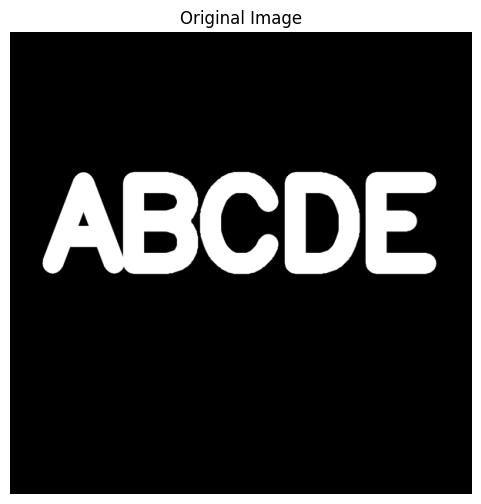

In [77]:
img = load_img()
display_img(img, "Original Image")

## Dilation

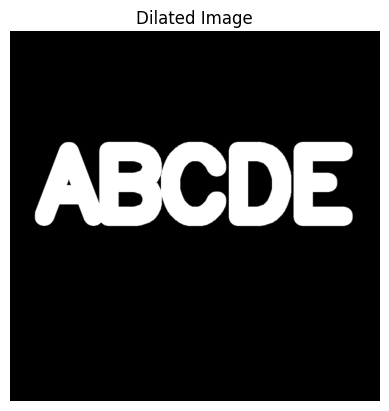

In [78]:
kernel = np.ones((5,5), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

plt.imshow(dilated_img, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')
plt.show()

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

Kernel:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


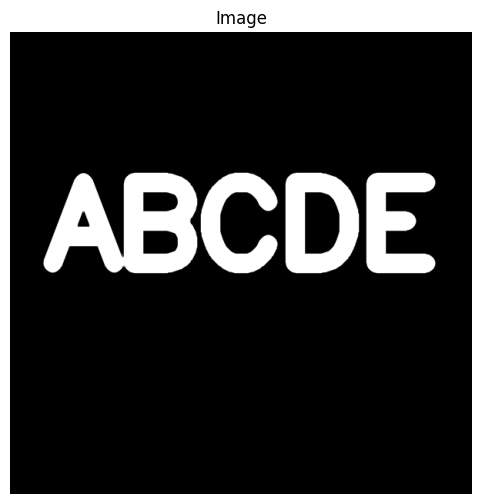

In [79]:
binary = load_img()

kernel = np.ones((3, 3), dtype=np.uint8)
print("Kernel:\n", kernel)

erosion = cv2.erode(binary, kernel, iterations=1)

display_img(erosion)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

(600, 600) uint8


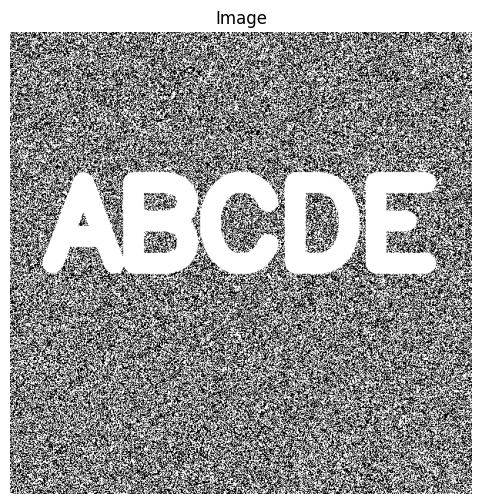

In [80]:
import cv2
import numpy as np

binary = load_img() 
print(binary.shape, binary.dtype)

noise = np.random.randint(0, 2, size=binary.shape, dtype=np.uint8) * 255

binary = binary.astype(np.uint8)
noise = noise.astype(np.uint8)

noise_img = cv2.bitwise_or(binary, noise)

display_img(noise_img)


### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [81]:
img = load_img()

In [82]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [83]:
black_noise

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 1]], shape=(600, 600), dtype=int32)

In [84]:
black_noise= black_noise * -255

In [85]:
black_noise_img = img + black_noise

In [86]:
black_noise_img 

array([[-255, -255,    0, ..., -255,    0,    0],
       [   0, -255,    0, ...,    0,    0, -255],
       [   0, -255, -255, ..., -255,    0, -255],
       ...,
       [-255, -255, -255, ..., -255, -255, -255],
       [   0,    0,    0, ..., -255, -255,    0],
       [-255, -255,    0, ..., -255,    0, -255]],
      shape=(600, 600), dtype=int32)

In [87]:
black_noise_img[black_noise_img==-255] = 0

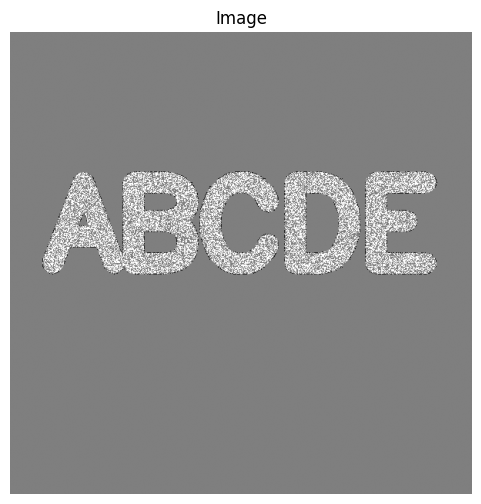

In [88]:
display_img(black_noise_img)

In [89]:
black_noise_img = black_noise_img.astype(np.uint8)
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

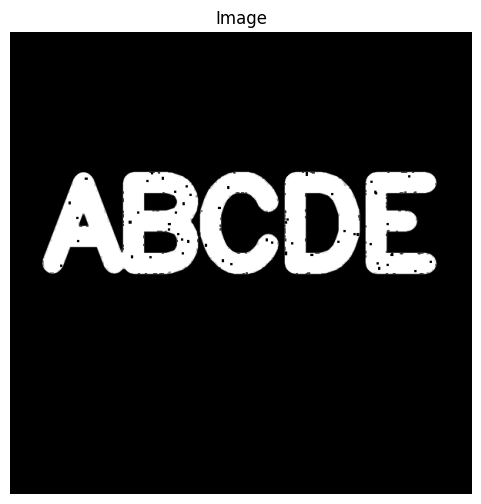

In [90]:
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [91]:
img = load_img()

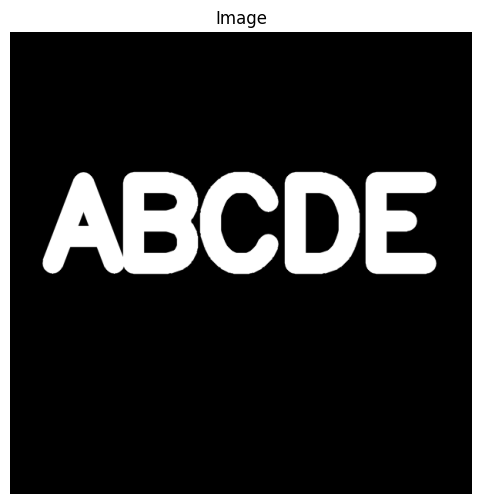

In [92]:
display_img(img)

In [93]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

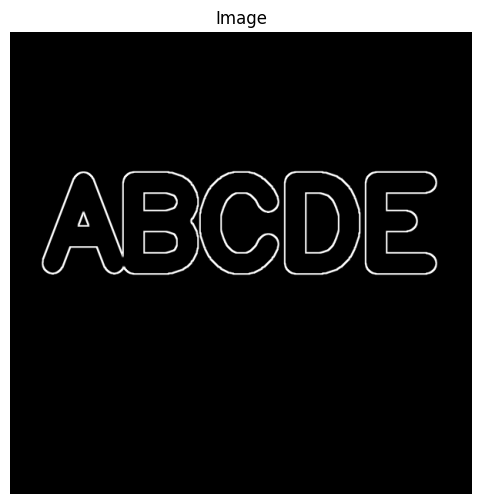

In [94]:
display_img(gradient)